In [4]:
import pandas as pd
import math

In [13]:
df = pd.read_csv('bodyPerformance.csv')
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [14]:
df.shape

(13393, 12)

In [20]:
numeric_data = df.select_dtypes(exclude='object')
numeric_data.head(2)

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0


In [19]:
categorical_data = df.select_dtypes(include='object')
categorical_data.head(2)

,gender,class
0,M,C
1,M,A


In [21]:
# Measure of Central Tendency
# Mean
df.mean()

age                         36.775106
height_cm                  168.559807
weight_kg                   67.447316
body fat_%                  23.240165
diastolic                   78.796842
systolic                   130.234817
gripForce                   36.963877
sit and bend forward_cm     15.209268
sit-ups counts              39.771224
broad jump_cm              190.129627
dtype: float64

In [22]:
# Mean of individual column of dataframe
df['body fat_%'].mean()

23.240164950869843

In [23]:
from scipy.stats import gmean
# geometric mean - square root of multiplication of all the values
gmean(df['body fat_%'])

22.053450257160534

In [25]:
# the harmonic mean - In general, it is used when there is a necessity to give greater weight to the smaller items.
# It is applied in the case of times and average rates
import statistics
statistics.harmonic_mean(df['body fat_%'])

20.766092233445065

In [26]:
# maximum time repeated value
df.mode() 

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,21.0,M,170.0,70.5,23.1,80.0,120.0,43.1,20.0,45.0,211.0,C
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D


In [27]:
# Median is the 50%th percentile of the data. It is exactly the center point of the data.
# Median represents the middle value for any group. It is the point at which half the data is more and 
# half the data is less. - - Median helps to represent a large number of data points with a single data point
statistics.median(df['body fat_%'])

22.8

In [28]:
# VARIANCE
# In statistics, the variance is a measure of how far individual (numeric) values in a dataset are from the mean or average value.
# The variance is often used to quantify spread or dispersion. Spread is a characteristic of a sample or population that describes how much variability there is in it.
# A high variance tells us that the values in our dataset are far from their mean. So, our data will have high levels of variability.
# On the other hand, a low variance tells us that the values are quite close to the mean. In this case, the data will have low levels of variability.

statistics.variance(df['body fat_%'])

52.66178600041373

In [29]:
statistics.variance(df['height_cm'])

71.00729348140638

In [30]:
# standard deviation
statistics.stdev(df['body fat_%'])

7.256844079929906

In [31]:
# shape of data - how data is distributed horizontally
df.skew()

age                        0.599896
height_cm                 -0.186882
weight_kg                  0.349805
body fat_%                 0.361132
diastolic                 -0.159637
systolic                  -0.048654
gripForce                  0.018456
sit and bend forward_cm    0.785492
sit-ups counts            -0.467830
broad jump_cm             -0.422623
dtype: float64

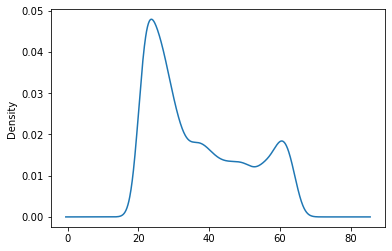

In [32]:
#Example of positive skewness
df['age'].plot(kind = 'density')

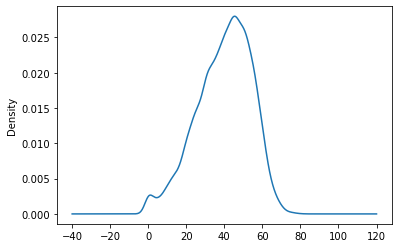

In [33]:
#Example of negative skewness
df['sit-ups counts'].plot(kind = 'density')

/Users/GA20232204/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/GA20232204/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/GA20232204/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/GA20232204/opt/anaconda3

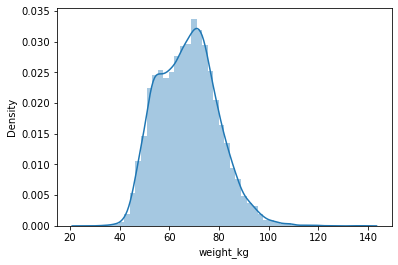

In [35]:
#Normal Distribution/Symmetric - displot (distribution plot)
import seaborn as sns
sns.distplot(df['weight_kg'],hist=True,kde=True)

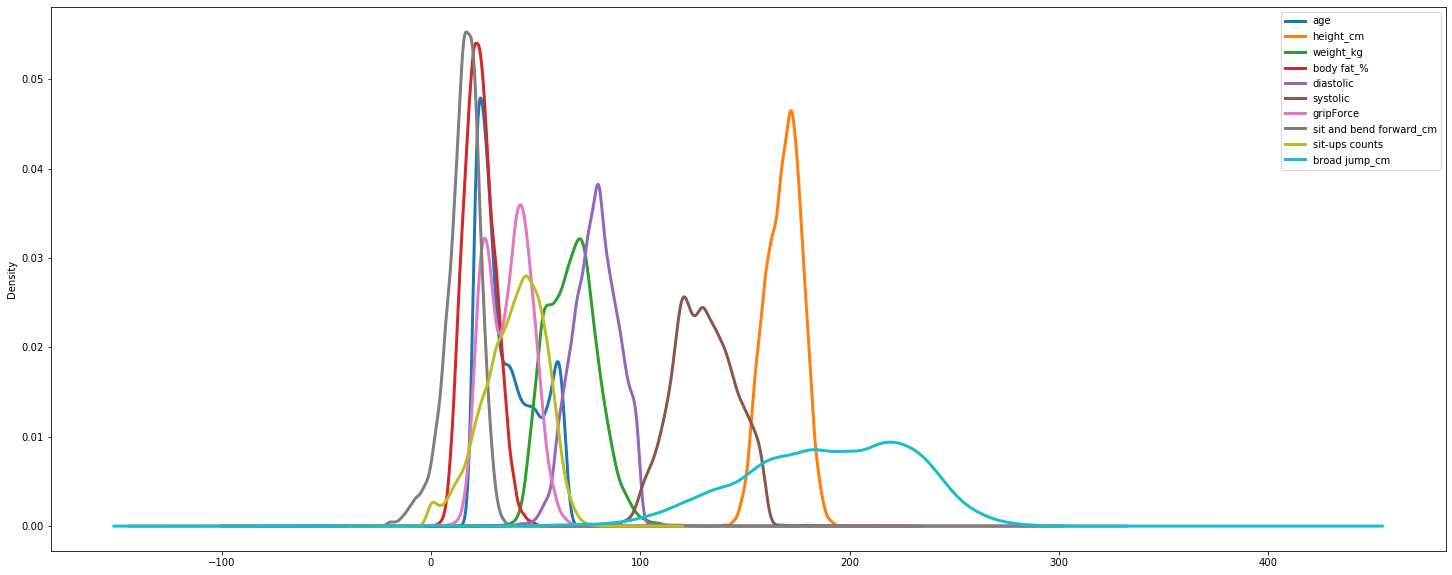

In [38]:
#Density of all features
df.plot.density(figsize = (25, 10),linewidth = 3)

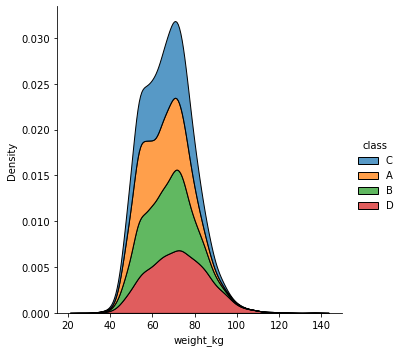

In [39]:
sns.displot(df, x="weight_kg", hue="class", kind="kde", multiple="stack")
# class wise distribution

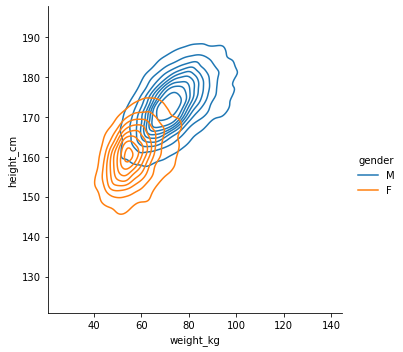

In [40]:
sns.displot(df, x="weight_kg", y="height_cm", hue="gender", kind="kde")


In [41]:
# Kurtosis is the measure of describing the distribution of data. -  vertically
# This data is distributed in different ways. They are:
# Platykurtic
# Mesokurtic
# Leptokurtic
df.kurt()

age                        -1.017671
height_cm                  -0.433053
weight_kg                   0.171606
body fat_%                  0.128712
diastolic                   0.363525
systolic                    0.380285
gripForce                  -0.822200
sit and bend forward_cm    35.220856
sit-ups counts             -0.156326
broad jump_cm               0.002397
dtype: float64

In [ ]:
# Inter Quartile Range(IQR)¶
# The interquartile range tells you the spread of the middle half of your distribution.
# Quartiles segment any distribution that’s ordered from low to high into four equal parts. 
# The interquartile range (IQR) contains the second and third quartiles, or the middle half of your data set.


In [42]:
for col in numeric_data.columns:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    print('IQR of %s : %d' %(col,IQR))   

IQR of age : 23
IQR of height_cm : 12
IQR of weight_kg : 17
IQR of body fat_% : 10
IQR of diastolic : 15
IQR of systolic : 21
IQR of gripForce : 17
IQR of sit and bend forward_cm : 9
IQR of sit-ups counts : 20
IQR of broad jump_cm : 59


In [44]:
df["age"].min(), df["age"].max()

(21.0, 64.0)

In [45]:
#We can also find different percentiles of particular column
df['weight_kg'].quantile([0.1,0.2,0.4,0.5])

0.1    52.2
0.2    56.1
0.4    64.0
0.5    67.4
Name: weight_kg, dtype: float64

In [46]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   height_cm                13393 non-null  float64
 2   weight_kg                13393 non-null  float64
 3   body fat_%               13393 non-null  float64
 4   diastolic                13393 non-null  float64
 5   systolic                 13393 non-null  float64
 6   gripForce                13393 non-null  float64
 7   sit and bend forward_cm  13393 non-null  float64
 8   sit-ups counts           13393 non-null  float64
 9   broad jump_cm            13393 non-null  float64
dtypes: float64(10)
memory usage: 1.0 MB


In [47]:
# Range
for col in numeric_data.columns:
    range = df[col].max() - df[col].min()
    print('range of %s : %d'%(col,range))

range of age : 43
range of height_cm : 68
range of weight_kg : 111
range of body fat_% : 75
range of diastolic : 156
range of systolic : 201
range of gripForce : 70
range of sit and bend forward_cm : 238
range of sit-ups counts : 80
range of broad jump_cm : 303


In [49]:
# Mean Absolute Deviation
# The mean absolute deviation of a dataset is the average distance between each data point and the mean.
# It gives us an idea about the variability in a dataset.
df.mad()
# As we can see, 'broad jump_cm' feature has the highest variability in our data.


age                        11.844362
height_cm                   6.919084
weight_kg                   9.680199
body fat_%                  5.833442
diastolic                   8.651310
systolic                   12.026424
gripForce                   9.068306
sit and bend forward_cm     6.268510
sit-ups counts             11.571289
broad jump_cm              32.726099
dtype: float64

In [51]:
# Inferential Statistics - offers methods to study experiments done on small samples of data and chalk out the 
# inferences to the entire population (entire domain).
# 1. sampling
#random sampling in python
df.sample(8)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
13326,43.0,F,161.5,61.20,31.0,80.0,109.0,19.0,10.4,15.0,128.0,D
6455,37.0,M,170.7,85.80,31.9,78.0,141.0,44.4,5.6,42.0,224.0,D
7285,29.0,F,157.2,47.90,22.7,66.0,113.0,28.6,19.5,40.0,157.0,A
11983,28.0,M,171.7,65.98,15.2,93.0,147.0,37.3,5.5,46.0,228.0,C
11548,41.0,M,167.9,71.80,13.1,65.0,113.0,51.7,13.4,47.0,225.0,B
10416,56.0,M,162.0,73.60,30.5,76.0,134.0,38.8,15.6,21.0,176.0,D
4225,23.0,M,179.1,68.40,18.9,98.0,139.0,42.9,7.1,46.0,217.0,C
13059,40.0,M,174.8,79.10,18.2,72.0,148.0,47.2,19.2,50.0,239.0,B


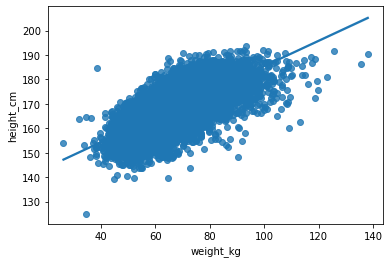

In [58]:
# confidence interval
sns.regplot(data = df, x="weight_kg", y="height_cm", ci=95)

In [60]:
#In-built function to calculate Confidence interval
import statsmodels.api as sm
sm.stats.DescrStatsW(df['age']).zconfint_mean()

(36.54434346585151, 37.00586933187864)

In [61]:
import scipy.stats as stats
z_scores = stats.zscore(numeric_data)
z_scores

array([[-0.71743212,  0.44387298,  0.65215002, ...,  0.37731734,
         1.41696147,  0.67400862],
       [-0.8642197 , -0.42246548, -0.97473438, ...,  0.12898358,
         0.92663372,  0.97501314],
       [-0.42385695,  1.31021144,  0.88312744, ..., -0.37950936,
         0.64644644, -0.22900492],
       ...,
       [ 0.16329338,  1.02538783,  1.09234611, ...,  0.14080899,
         0.36625915,  0.97501314],
       [ 1.99813815, -2.66545136, -0.81572819, ..., -0.71062104,
        -2.7858478 , -2.88787813],
       [-0.20367558, -0.54114198, -0.11275345, ..., -0.9589548 ,
         0.78654008, -0.25408863]])

In [65]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats


In [66]:
dataset=sns.load_dataset('tips')
dataset.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [67]:
dataset_table=pd.crosstab(dataset['sex'],dataset['smoker'])
print(dataset_table)

smoker  Yes  No
sex            
Male     60  97
Female   33  54


In [71]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[60 97]
 [33 54]]


In [73]:
val=stats.chi2_contingency(dataset_table)
val

(0.008763290531773594,
 0.925417020494423,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [74]:
Expected_Values=val[3]
Expected_Values

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [75]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [77]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
chi_square_statistic

0.001934818536627623

In [79]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [78]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.964915107315732
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.964915107315732


In [80]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
     

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [81]:
# one sample t test
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [82]:
import numpy as np
ages_mean=np.mean(ages)
print(ages_mean)

30.34375


In [83]:
## Lets take sample
sample_size=10
age_sample=np.random.choice(ages,sample_size)

In [85]:
from scipy.stats import ttest_1samp
ttest,p_value=ttest_1samp(age_sample,30) #30 is taken randomly
p_value

0.26650131214269335

In [86]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


In [87]:
np.random.seed(12)
ClassB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)
ClassB_ages.mean()

50.63333333333333